In [1]:
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
forecast = requests.get("http://api.weatherapi.com/v1/forecast.json?key=4a1f9e155ac6494e98a15506222712&q=SE93HX&days=1&aqi=no&alerts=no")

In [3]:
print (f"Response code: {forecast.status_code}")

Response code: 200


In [4]:
df = pd.read_json(forecast.text)
df.head()

,location,current,forecast
name,Eltham,NaN,NaN
region,London,NaN,NaN
country,UK,NaN,NaN
lat,51.44,NaN,NaN
lon,0.06,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, name to forecastday
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  8 non-null      object
 1   current   23 non-null     object
 2   forecast  1 non-null      object
dtypes: object(3)
memory usage: 1.0+ KB


In [6]:
df.isna().sum()

location    24
current      9
forecast    31
dtype: int64

In [7]:
df.describe()

,location,current,forecast
count,8,23,1
unique,8,23,1
top,Eltham,1680279300,"[{'date': '2023-03-31', 'date_epoch': 16802208..."
freq,1,1,1


In [8]:
df = df.fillna(0)

In [9]:
df_forecast = df["forecast"]


In [10]:
x = df.loc["forecastday"]["forecast"]

def convert(a):
    it = iter(a)
    res_dct = dict(zip(it, it))
    return res_dct

#print (convert(x))





In [11]:
column = []
df_forecast = df.forecast.loc["forecastday"]
df_forecast = np.array(df_forecast)

df_forecast = pd.DataFrame(df_forecast)

df_forecast

,0
0,"{'date': '2023-03-31', 'date_epoch': 168022080..."


In [12]:
print (df_forecast)

for i in df_forecast:
    print (df_forecast[i])

                                                   0
0  {'date': '2023-03-31', 'date_epoch': 168022080...
0    {'date': '2023-03-31', 'date_epoch': 168022080...
Name: 0, dtype: object


In [13]:
df_forecast

,0
0,"{'date': '2023-03-31', 'date_epoch': 168022080..."


In [14]:
type(df_forecast)

pandas.core.frame.DataFrame

In [15]:
x = [1, 2, 3, 4, 5]

x[::2]

[1, 3, 5]

In [16]:


forecast = df.loc["forecastday"]["forecast"]

forecast = pd.DataFrame(forecast)

In [17]:
forecast.columns

Index(['date', 'date_epoch', 'day', 'astro', 'hour'], dtype='object')

In [18]:
forecast

,date,date_epoch,day,astro,hour
0,2023-03-31,1680220800,"{'maxtemp_c': 10.3, 'maxtemp_f': 50.5, 'mintem...","{'sunrise': '06:38 AM', 'sunset': '07:31 PM', ...","[{'time_epoch': 1680217200, 'time': '2023-03-3..."


In [19]:
x = df['forecast']["forecastday"]

x = pd.DataFrame(x)
x

,date,date_epoch,day,astro,hour
0,2023-03-31,1680220800,"{'maxtemp_c': 10.3, 'maxtemp_f': 50.5, 'mintem...","{'sunrise': '06:38 AM', 'sunset': '07:31 PM', ...","[{'time_epoch': 1680217200, 'time': '2023-03-3..."


In [20]:
emission = pd.read_csv("greenhouse.csv")
print (max(emission.value))

7422207.96295139


In [21]:
emission.rename({"country_or_area": "country"}, axis=1, inplace=True)




In [22]:
emission.head()



,country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [23]:
unique = emission.country.unique()

In [24]:
unique

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [25]:
emission.columns

Index(['country', 'year', 'value', 'category'], dtype='object')

In [26]:
Australia = emission[emission.country == "Australia"]

In [27]:
Australia

,country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
7319,Australia,1994,282.640896,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7320,Australia,1993,264.759156,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7321,Australia,1992,246.858849,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7322,Australia,1991,228.944834,sulphur_hexafluoride_sf6_emissions_in_kilotonn...


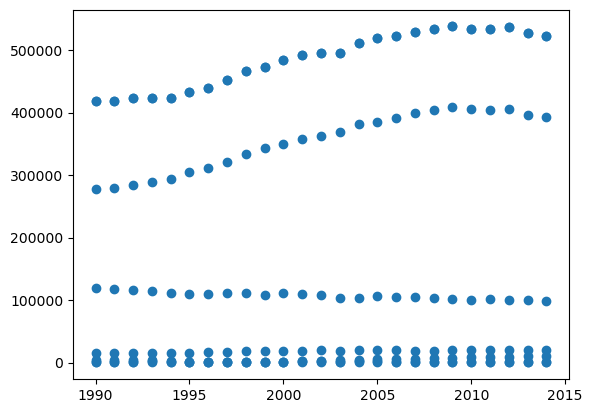

In [28]:
plt.scatter(Australia.year, Australia.value)

In [29]:
unique

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

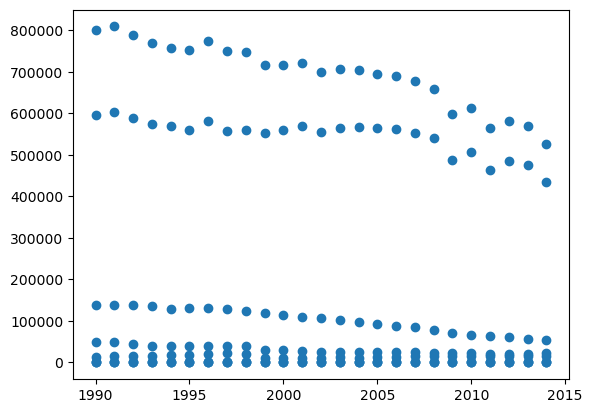

In [30]:
United_Kingdom = emission[emission.country == "United Kingdom"]
plt.scatter(United_Kingdom.year, United_Kingdom.value)

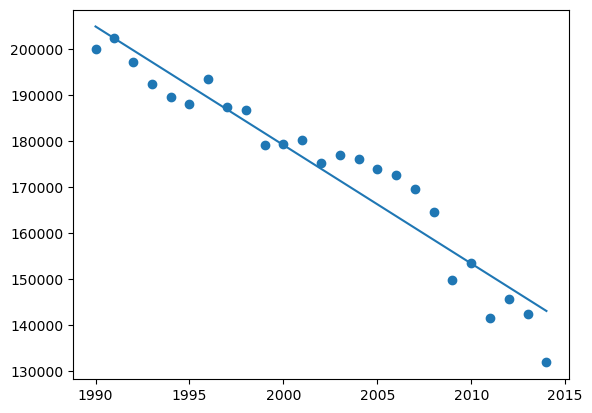

In [31]:
new = pd.DataFrame(United_Kingdom.groupby(["year"])["value"].mean())


new["Year"] = [i for i in new.index]

plt.scatter(new.Year, new.value)
reg = np.polyfit(new.Year, new.value, deg=1)
trend = np.polyval(reg, new.Year)
plt.plot(new.Year, trend)


In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [35]:
df = pd.read_csv("greenhouse.csv")
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [74]:
australia = df[df.country_or_area == "Australia"]
australia = australia.pivot_table(columns=["category"], values="value", index="year")
australia

category,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent
year,,,,,,,,
1990,278265.898941,418623.049563,418623.049563,1424.683520,118768.837813,15345.597858,4607.012919,211.018511
1991,279741.639012,418674.057494,418674.057494,1424.683520,117744.641814,14923.405021,4610.743294,228.944834
1992,284766.092718,423080.108191,423080.108191,1333.184000,116837.506726,15293.183355,4603.282544,246.858849
1993,289142.267681,423764.932564,423764.932564,1829.872000,113837.511923,15374.993428,3315.528376,264.759156
1994,293830.709141,424092.959373,424092.959373,1027.343549,110997.410185,15790.426852,2164.428749,282.640896
1995,305162.543549,433478.650826,433478.650826,1004.032111,109900.735111,15578.196408,1530.835665,302.307983
1996,311914.819824,439803.962228,439803.962228,414.170638,109185.337720,16609.586778,1410.395058,269.652210
1997,320439.116819,451721.717815,451721.717815,705.228318,111898.854749,17201.890783,1228.150898,248.476248
1998,334328.142647,466382.112472,466382.112472,998.289580,111427.929806,17743.913106,1660.518820,223.318513


In [75]:
australia.columns

Index(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent'],
      dtype='object', name='category')

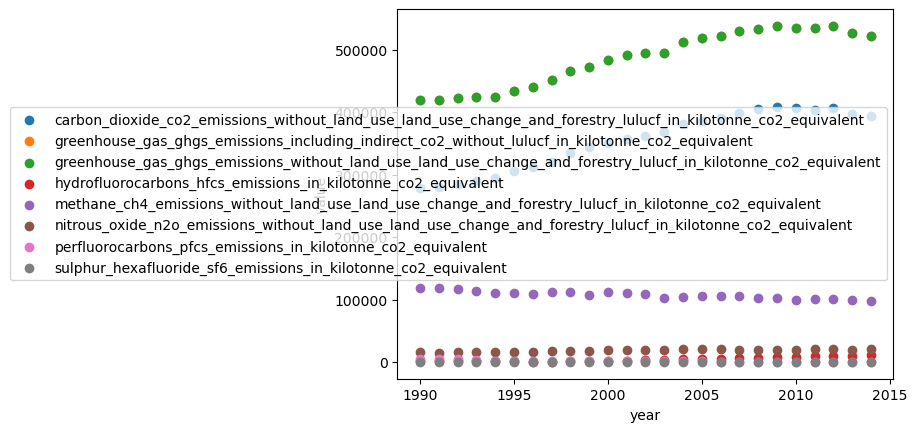

In [76]:
australia["year"] = [i for i in australia.index]
australia.index = [i for i in range(len(australia))]
for i in range(0, len(australia.columns) - 1):
    plt.scatter(x=australia["year"] , y=australia[australia.columns[i]])
plt.xlabel("year")
plt.ylabel("value")
plt.legend(australia.columns)
plt.show()

In [72]:
australia.year

0    0
Name: year, dtype: int64

In [58]:
len(australia)

australia.columns[25]

IndexError: index 25 is out of bounds for axis 0 with size 8

In [81]:
australia = df[df.country_or_area == "Australia"]

australia = australia.groupby(["year"])["value"].mean()
australia = pd.DataFrame(australia)
australia["year"] = [i for i in australia.index]
australia

,value,year
year,,
1990,156983.643586,1990
1991,157002.771560,1991
1992,158655.040572,1992
1993,158911.849712,1993
1994,159034.859765,1994
1995,162554.494060,1995
1996,164926.485836,1996
1997,169395.644180,1997
1998,174893.292177,1998


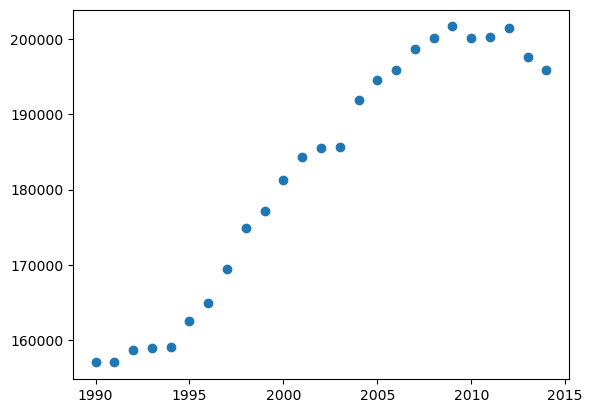

In [82]:
plt.scatter(australia.year, australia.value)